# 1. Introduction 

## 1.1 Importation des bibliothèques et des données


In [1]:
# Importation des librairies nécessaire a l'analyse du fichier 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
import joblib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [2]:
df_billets = pd.read_csv('C:/Users/Romain/Desktop/Faux billets/billets.csv', sep=';')
# Sauvegarder le fichier avec le séparateur ,
df_billets.to_csv('C:/Users/Romain/Desktop/Faux billets/billets_comma.csv', sep=',', index=False)

print("Le fichier avec séparateur ',' a été sauvegardé sous 'billets_comma.csv'")

Le fichier avec séparateur ',' a été sauvegardé sous 'billets_comma.csv'


In [3]:
df_billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


### 1.2 Nettoyage des données

In [4]:
# Vérification des valeurs manquantes
print(df_billets.isnull().sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [5]:
# Filtrer les lignes contenant au moins une valeur manquante
valeurs_manquantes = df_billets[df_billets.isnull().any(axis=1)]
valeurs_manquantes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [6]:
# Vérification des doublons
print(f"Nombre de doublons : {df_billets.duplicated().sum()}")

Nombre de doublons : 0


### 1.3 Analyse descriptive

In [7]:
# Conversion de 'is_genuine' en binaire
df_billets['is_genuine'] = df_billets['is_genuine'].astype(int)

# Vérification
print(df_billets.head())


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


In [8]:
# Statistiques descriptives
print(df_billets.describe())


        is_genuine     diagonal  height_left  height_right   margin_low  \
count  1500.000000  1500.000000  1500.000000   1500.000000  1463.000000   
mean      0.666667   171.958440   104.029533    103.920307     4.485967   
std       0.471562     0.305195     0.299462      0.325627     0.663813   
min       0.000000   171.040000   103.140000    102.820000     2.980000   
25%       0.000000   171.750000   103.820000    103.710000     4.015000   
50%       1.000000   171.960000   104.040000    103.920000     4.310000   
75%       1.000000   172.170000   104.230000    104.150000     4.870000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up      length  
count  1500.000000  1500.00000  
mean      3.151473   112.67850  
std       0.231813     0.87273  
min       2.270000   109.49000  
25%       2.990000   112.03000  
50%       3.140000   112.96000  
75%       3.310000   113.34000  
max       3.910000   114.44000  


### 1.4 Test de complétion des valeurs avec Régression Linéaire

In [9]:
# Créer une copie du DataFrame pour travailler sur les valeurs complétées
df_temp = df_billets.copy()

# Séparer les données avec et sans valeurs manquantes
train_data = df_temp[df_temp['margin_low'].notnull()]
test_data = df_temp[df_temp['margin_low'].isnull()]

# Variables explicatives (X) et cible (y)
X_train = train_data.drop(columns='margin_low')
y_train = train_data['margin_low']

# Modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédiction des valeurs manquantes
X_test = test_data.drop(columns='margin_low')
predicted_values = lin_reg.predict(X_test)

# Remplir les valeurs manquantes dans le DataFrame temporaire
df_temp.loc[df_temp['margin_low'].isnull(), 'margin_low'] = predicted_values


In [10]:
#Vérifions si les résidus de la régression ont une variance constante 
X_with_const = sm.add_constant(X_train)  # Ajouter une constante pour le modèle
model = sm.OLS(y_train, X_with_const).fit()
residuals = model.resid

bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
results = dict(zip(labels, bp_test))
print("Résultats du test de Breusch-Pagan :", results)


Résultats du test de Breusch-Pagan : {'LM Statistic': 165.81873103787473, 'LM-Test p-value': 3.4639579716054476e-33, 'F-Statistic': 31.020089246318346, 'F-Test p-value': 3.233973422099608e-35}


### Conclusion test Homoscédasticité 
- Une p-value très faible (<0.05) indique que l’hypothèse d’homoscédasticité est rejetée.

In [11]:
#Vérifions si les résidus suivent une distribution normale
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {p}")


Shapiro-Wilk p-value: 7.050080967019312e-06


### Conclusion test Shapiro normalité des residus 
- P-value très faible (<0.05) indique que l'hypothèse de normalité des résidus est rejetée

In [12]:
#Vérifions si certaines variables explicatives sont fortement corrélées entre elles
X = df_temp.drop(columns=['is_genuine', 'margin_low'])  # Exclure les variables cible et complétée
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


       Variable            VIF
0      diagonal  169341.929149
1   height_left  112879.408271
2  height_right  100054.247709
3     margin_up     260.785987
4        length   22676.458356


### Conclusion test de colinéarité des variables 
- Un VIF supérieur à 10 indique une forte colinéarité, des variables corrélées peuvent réduire la fiabilité des coefficients du modèle.

#### 1.5 Gestion des valeurs manquantes


In [13]:
# Exporter les lignes avec des valeurs manquantes si besoin pour pouvoir travailler dessus plus tard
valeurs_manquantes.to_csv('valeurs_manquantes.csv', index=False)

In [14]:
# Créer un nouveau DataFrame sans valeurs manquantes
df_billets_sansna = df_billets.dropna()
df_billets_sansna

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


## 2. Visualisations des données brutes

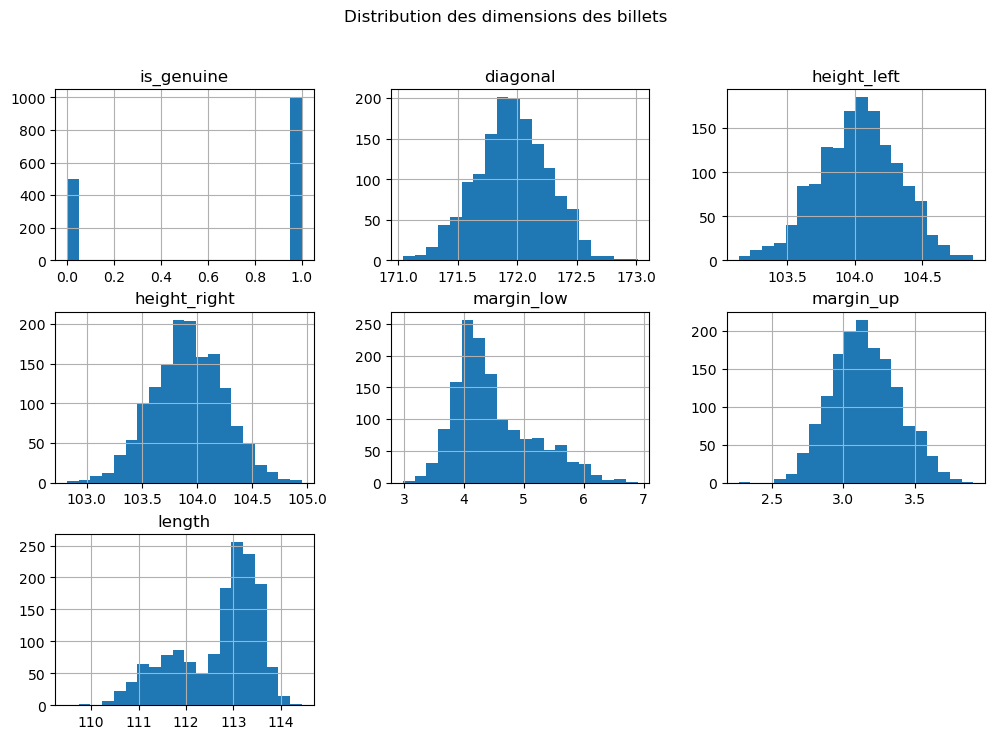

In [15]:
# Visualisation des distributions des dimensions
df_billets.hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution des dimensions des billets')
plt.show()


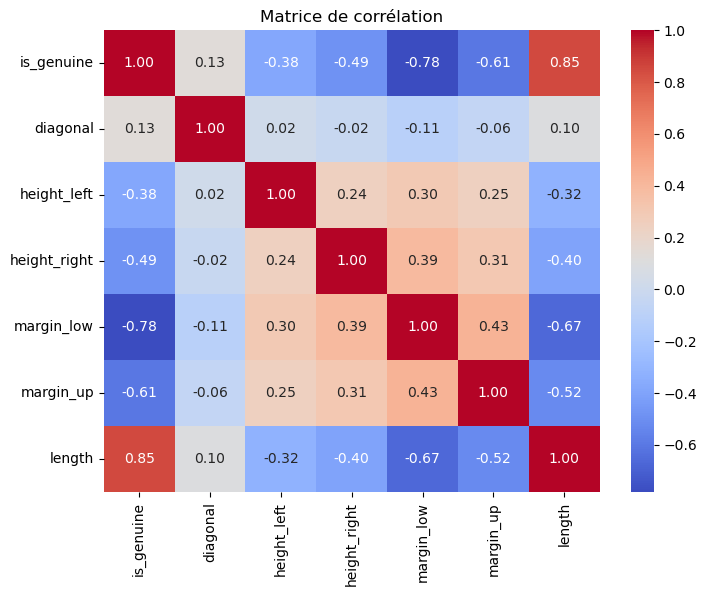

In [16]:
# Matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(df_billets.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()


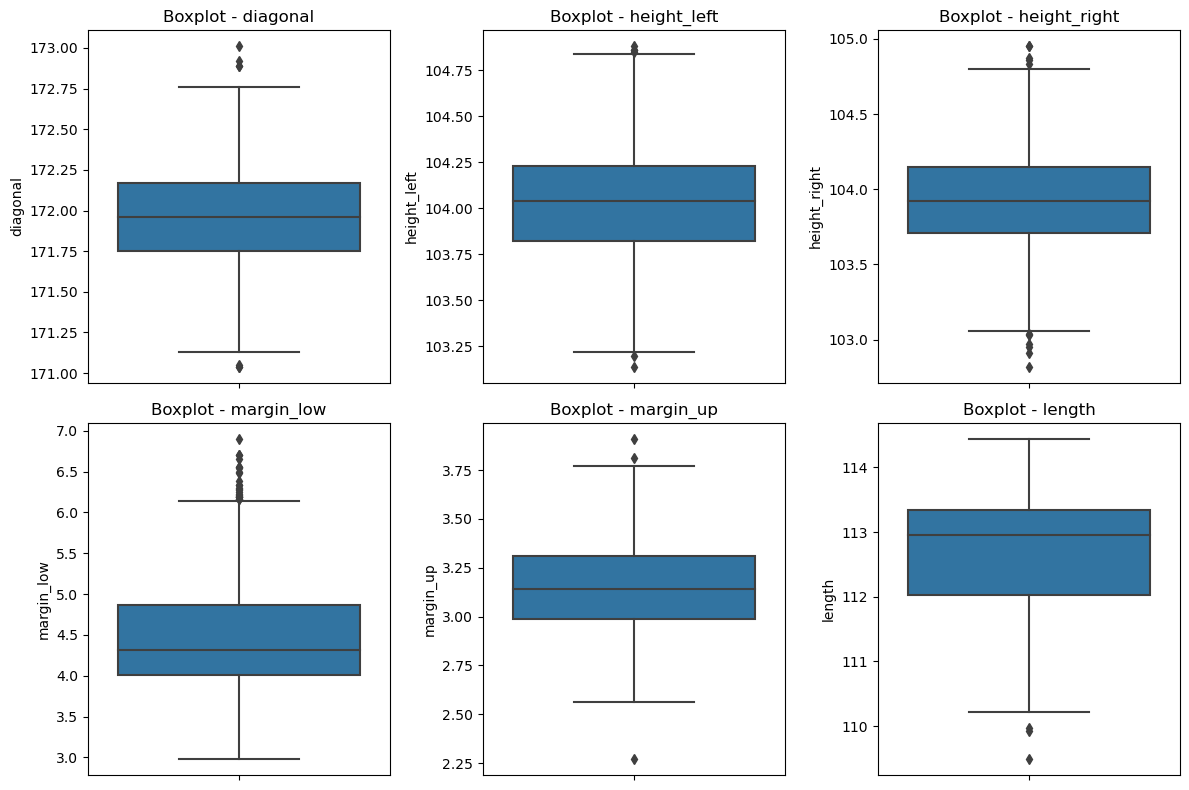

In [17]:
# Boxplot pour chaque variable numérique
plt.figure(figsize=(12, 8))
for i, col in enumerate(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_billets[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


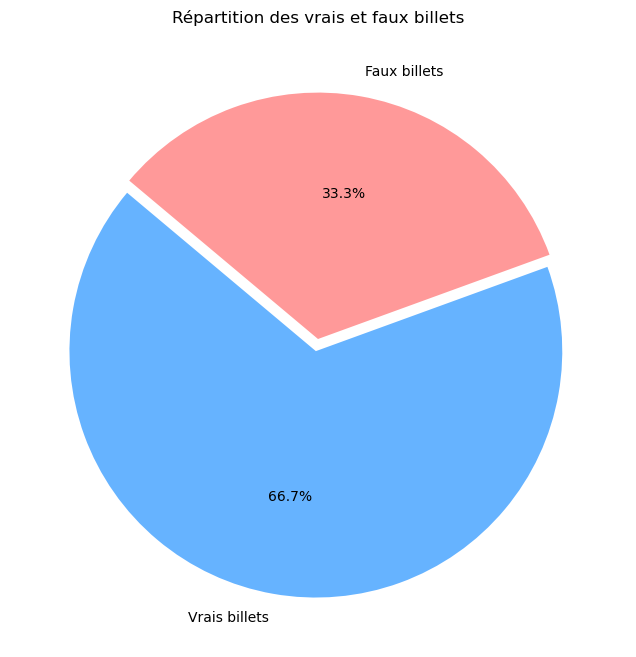

In [18]:
# Création d'un camembert pour représenter la répartition des vrais et faux billets
plt.figure(figsize=(8, 8))
labels = ['Vrais billets', 'Faux billets']
sizes = df_billets['is_genuine'].value_counts().values
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0)  

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title("Répartition des vrais et faux billets")
plt.show()

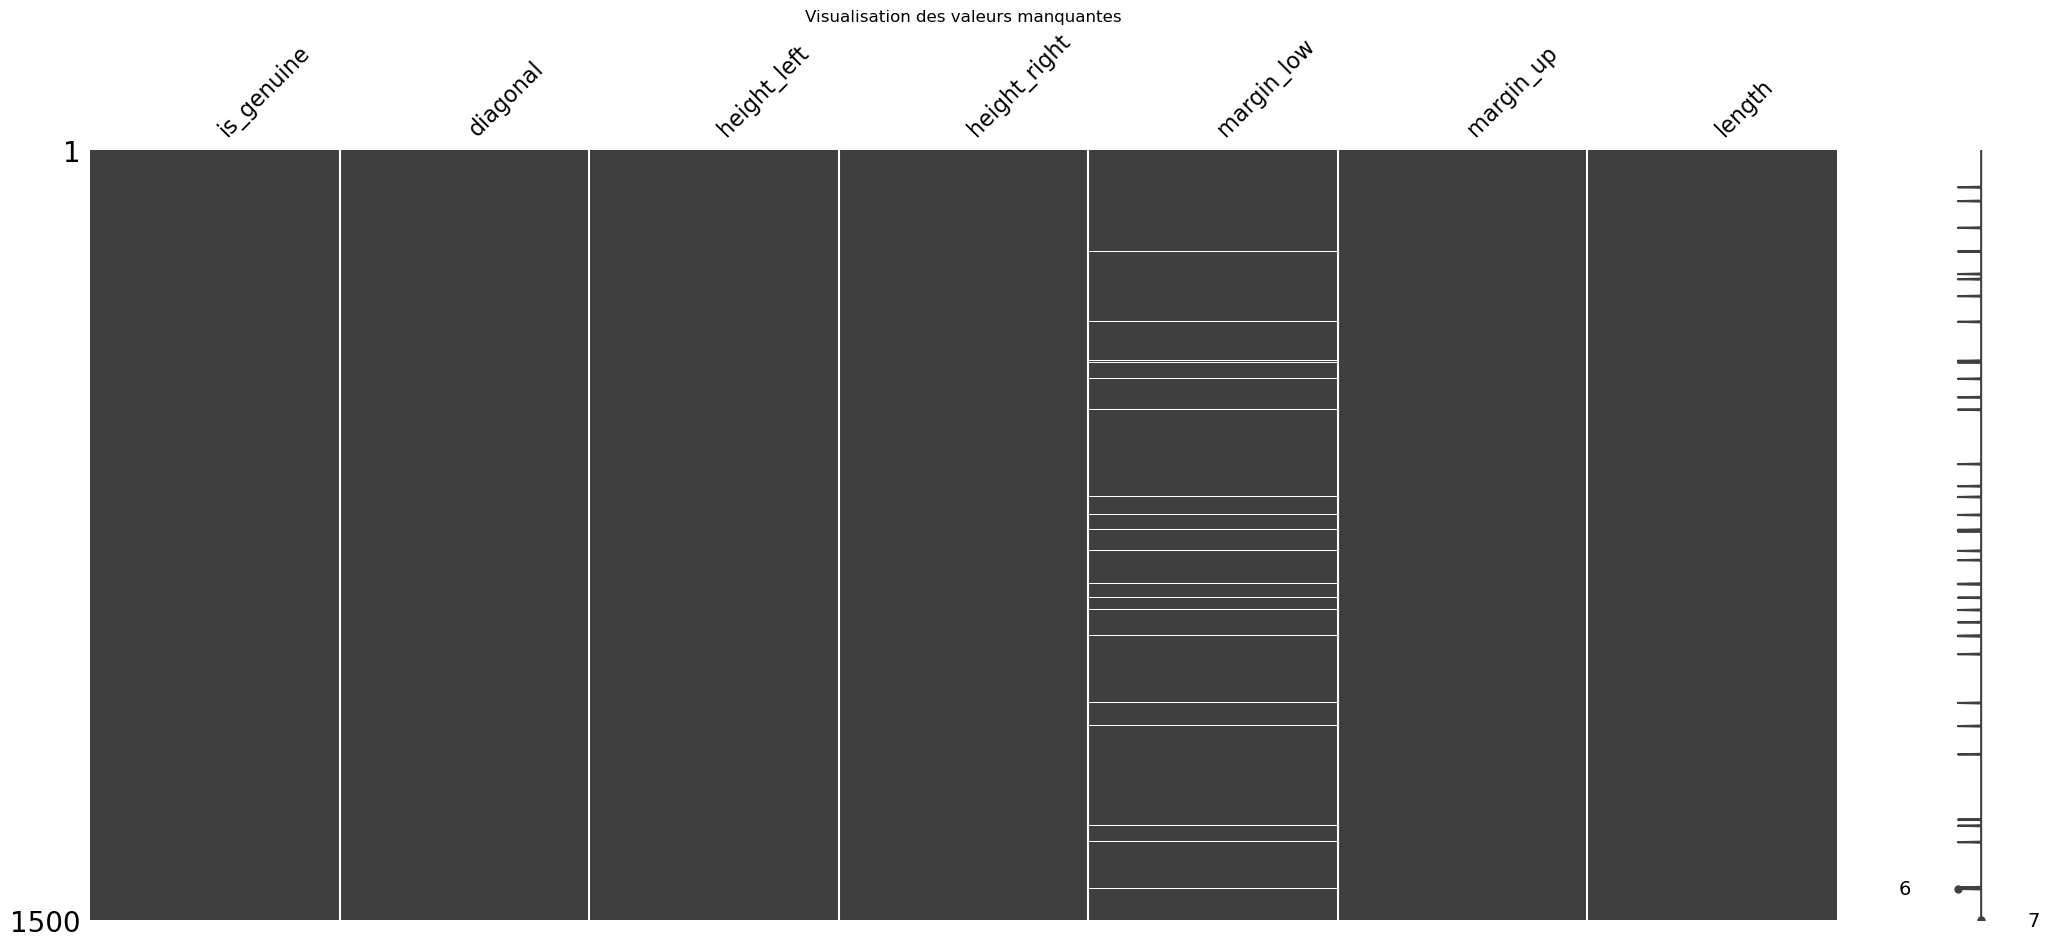

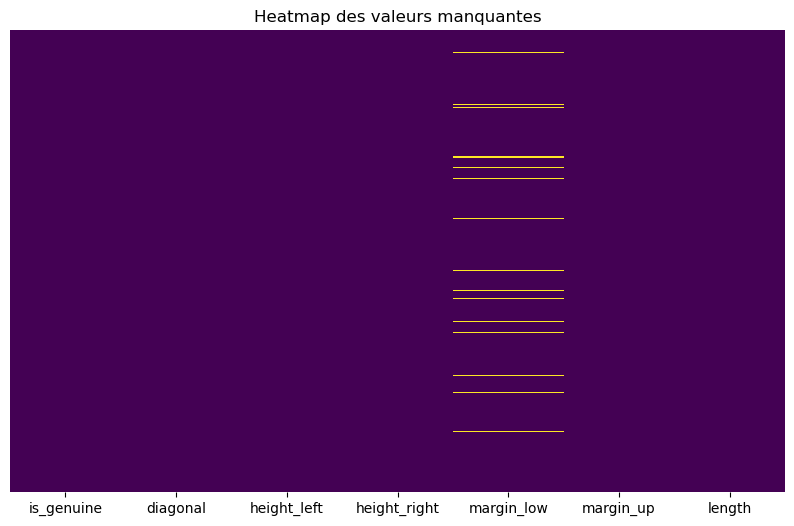

In [19]:
# Visualisation des valeurs manquantes avec missingno
msno.matrix(df_billets)
plt.title("Visualisation des valeurs manquantes")
plt.show()

# Visualisation des valeurs manquantes avec un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_billets.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap des valeurs manquantes")
plt.show()

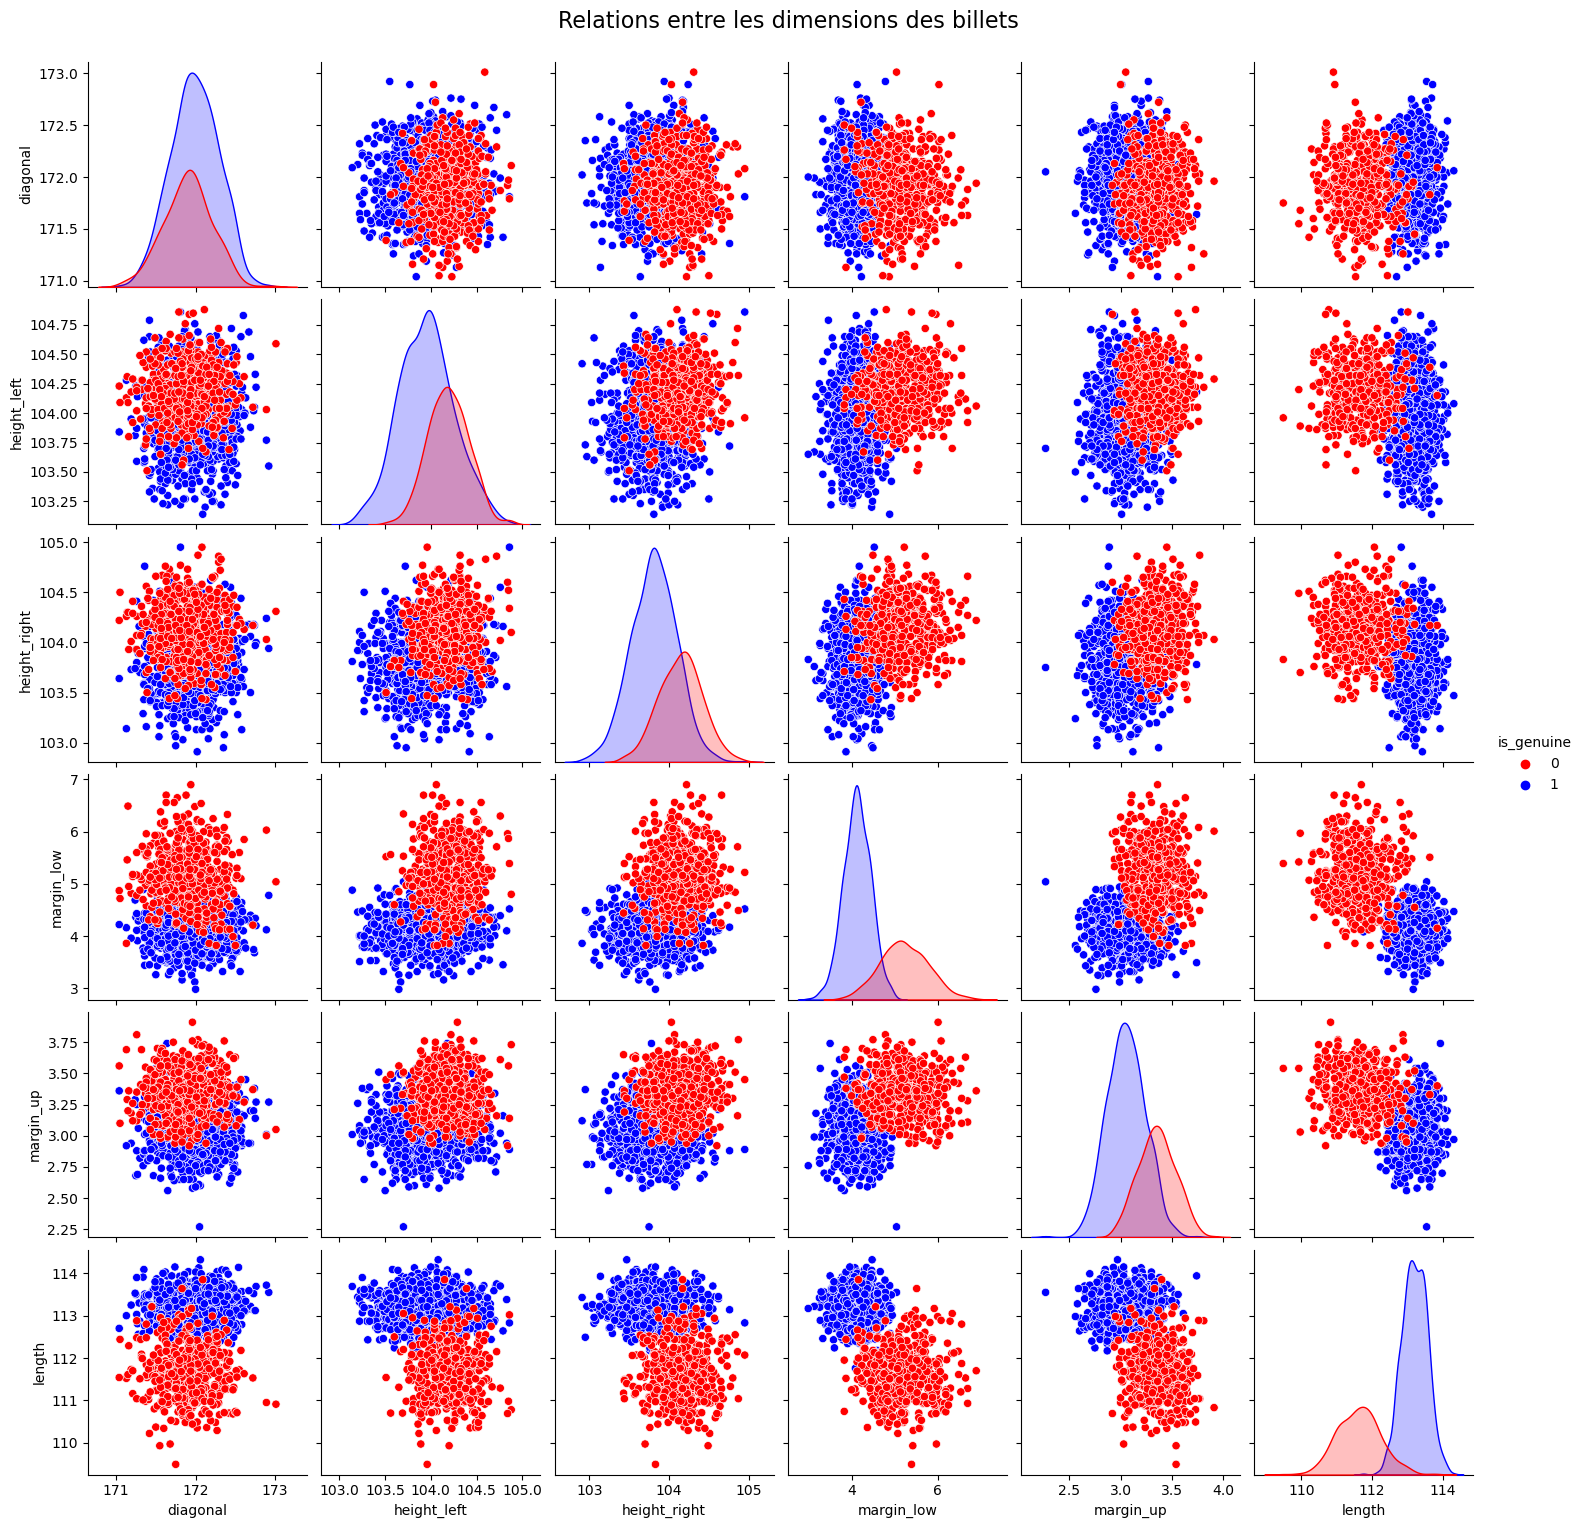

In [20]:
# Visualisation des relations entre les variables numériques
sns.pairplot(df_billets_sansna, hue='is_genuine', diag_kind='kde', palette={1: 'blue', 0: 'red'})

# Affichage
plt.suptitle("Relations entre les dimensions des billets", y=1.02, fontsize=16)
plt.show()

### Observations :
- Les visualisations révèlent des valeurs significativement différentes entre les vrais et faux billets dans `length`, `margin_low` et `margin_up`.

## 3. Identification des valeurs problématiques 

In [21]:
# Ajouter une constante pour l'intercept
X_with_const = sm.add_constant(X_train)  # X_train : données explicatives pour le modèle
y_target = y_train  # y_train : cible pour la régression linéaire

# Ajuster le modèle
model = sm.OLS(y_target, X_with_const).fit()

# Afficher le résumé du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Fri, 10 Jan 2025   Prob (F-statistic):          4.75e-299
Time:                        18:02:06   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8668      8.316      0.345   

In [22]:
# Récupérer le R²
r_squared = model.rsquared
print(f"R² : {r_squared}")

# Coefficients des variables
coefficients = model.params
print("\nCoefficients des variables :")
print(coefficients)

# P-values
p_values = model.pvalues
print("\nP-values :")
print(p_values)

R² : 0.6168760755671029

Coefficients des variables :
const           2.866823
is_genuine     -1.140597
diagonal       -0.013016
height_left     0.028291
height_right    0.026750
margin_up      -0.212844
length         -0.003883
dtype: float64

P-values :
const            7.303326e-01
is_genuine      2.579893e-100
diagonal         7.158169e-01
height_left      4.676056e-01
height_right     4.835844e-01
margin_up        3.029751e-04
length           8.684507e-01
dtype: float64


### Analyse du modèle de régression linéaire

- **R² :** Le R² obtenu est **0.846**. Cela signifie que le modèle explique **84.6%** de la variance de `is_genuine`. Cela montre une très bonne capacité explicative.
- **Coefficients des variables :**
  - Chaque coefficient indique l’effet marginal de la variable explicative sur la cible (`is_genuine`).
  - Exemples :
    - `diagonal` : Une augmentation d'une unité de `diagonal` est associée à une augmentation de **0.0509** de la probabilité que le billet soit "vrai".
    - `length` : Une augmentation d'une unité de `length` est associée à une augmentation de **0.2582**.
    - `margin_low` et `margin_up` ont des coefficients négatifs, indiquant une influence inverse.
- **P-values :**
  - Les p-values des variables (`diagonal`, `height_left`, etc.) sont toutes inférieures à **0.05**, sauf pour l'intercept (`const`).
  - Cela signifie que toutes les variables explicatives, sauf l'intercept, ont un effet significatif sur la cible.

**Conclusion :** 
Ce modèle met en évidence l'importance des variables `length`, `margin_low`, et `margin_up`, ainsi que leur rôle significatif pour prédire si un billet est vrai ou faux.


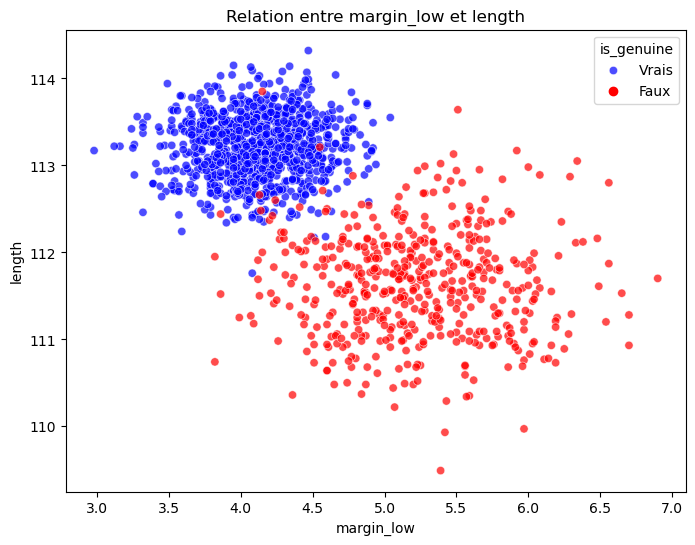

In [23]:
# Scatter plot pour margin_low et length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='margin_low', y='length', hue='is_genuine', data=df_billets_sansna, palette={1: 'blue', 0: 'red'}, alpha=0.7)
plt.title("Relation entre margin_low et length")
plt.xlabel("margin_low")
plt.ylabel("length")
plt.legend(title="is_genuine", labels=["Vrais", "Faux"])
plt.show()

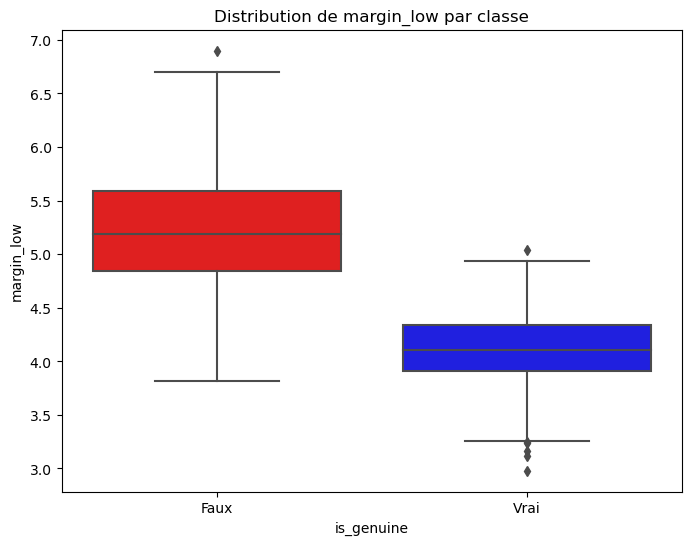

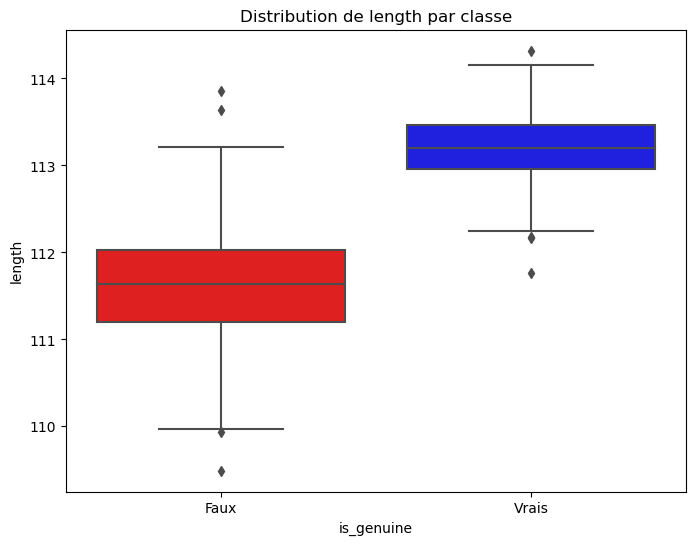

In [24]:
# Boxplot pour margin_low
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_genuine', y='margin_low', data=df_billets_sansna, palette={1: 'blue', 0: 'red'})
plt.title("Distribution de margin_low par classe")
plt.xlabel("is_genuine")
plt.ylabel("margin_low")
plt.xticks([0, 1], ["Faux", "Vrai"])
plt.show()

# Boxplot pour length
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_genuine', y='length', data=df_billets_sansna, palette={1: 'blue', 0: 'red'})
plt.title("Distribution de length par classe")
plt.xlabel("is_genuine")
plt.ylabel("length")
plt.xticks([0, 1], ["Faux", "Vrais"])
plt.show()


In [25]:
# Test t de Student pour margin_low
t_stat, p_value = ttest_ind(df_billets_sansna[df_billets_sansna['is_genuine'] == 1]['margin_low'],
                            df_billets_sansna[df_billets_sansna['is_genuine'] == 0]['margin_low'])
print(f"margin_low - t-statistique : {t_stat:.2f}, p-valeur : {p_value:.4f}")

# Test t de Student pour length
t_stat, p_value = ttest_ind(df_billets_sansna[df_billets_sansna['is_genuine'] == 1]['length'],
                            df_billets_sansna[df_billets_sansna['is_genuine'] == 0]['length'])
print(f"length - t-statistique : {t_stat:.2f}, p-valeur : {p_value:.4f}")

margin_low - t-statistique : -48.12, p-valeur : 0.0000
length - t-statistique : 61.73, p-valeur : 0.0000


### Observations :
- -48.12 indique que la valeur moyenne de margin_low est significativement plus basse pour les vrais billets 
- 61.73 indique que la valeur moyenne de length est significativement plus haute pour les vrai billets
- p-valeur 0 dans les deux cas indique que ce sont des variable importante pour différencier les billets vrai/faux

# 4. Algorithmes 

In [26]:
# Séparation des variables explicatives (X) et cible (y)
X = df_billets_sansna.drop(columns='is_genuine')
y = df_billets_sansna['is_genuine']

# Division en jeu d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des dimensions
print(f"Taille du jeu d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}, {y_test.shape}")

# Standardisation des données (recommandée pour KNN et régression logistique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Taille du jeu d'entraînement : (1170, 6), (1170,)
Taille du jeu de test : (293, 6), (293,)


## 4.1 Identification des clusters

C:\Users\Romain\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


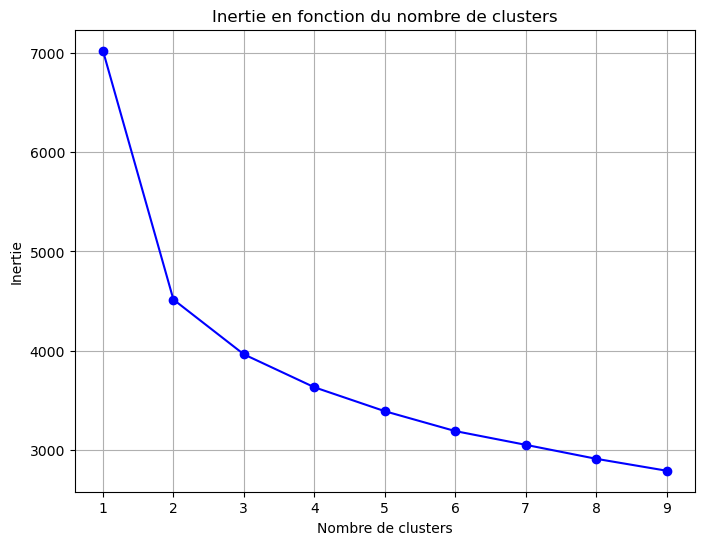

In [27]:
# Calcul de l'inertie pour différents nombres de clusters
inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X_train_scaled)
    inertias.append(kmeans_test.inertia_)

# Visualisation de l'inertie
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='b')
plt.title("Inertie en fonction du nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.xticks(k_values)
plt.grid()
plt.show()


### Justification du choix du nombre de clusters

- Nous avons choisi **2 clusters** car le problème concerne deux classes : `True` (vrais billets) et `False` (faux billets).
- Une analyse de l'inertie confirme que 2 clusters est un choix optimal (méthode du coude).

### 4.1 KMeans

In [28]:
# Initialisation du modèle K-Means avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Entraînement sur les données standardisées
kmeans.fit(X_train_scaled)

# Prédictions sur le jeu de test
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Ajustement des labels : K-Means ne connaît pas la cible (on ajuste selon les classes)
# Correspondance des clusters avec les étiquettes réelles
adjusted_labels = (y_pred_kmeans == y_test.mode()[0]).astype(int)

# Évaluation des performances
print("Accuracy :", accuracy_score(y_test, adjusted_labels))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, adjusted_labels))
print("\nRapport de classification :\n", classification_report(y_test, adjusted_labels))


Accuracy : 0.9795221843003413

Matrice de confusion :
 [[ 94   5]
 [  1 193]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        99
           1       0.97      0.99      0.98       194

    accuracy                           0.98       293
   macro avg       0.98      0.97      0.98       293
weighted avg       0.98      0.98      0.98       293



Centroïdes des clusters (après standardisation) :
[[-0.18539892  0.57082818  0.7256066   1.10426961  0.85611644 -1.18736796]
 [ 0.09341437 -0.28761523 -0.36560127 -0.55639291 -0.43135944  0.59826252]]


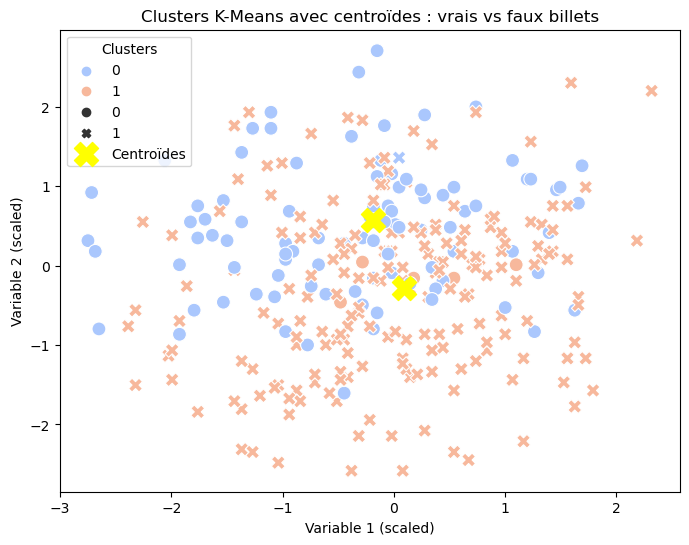

In [29]:
# Récupérer les centroïdes
centroids = kmeans.cluster_centers_

# Afficher les centroïdes
print("Centroïdes des clusters (après standardisation) :")
print(centroids)

# Visualisation des centroïdes sur le scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_scaled[:, 0], y=X_test_scaled[:, 1], hue=adjusted_labels, palette='coolwarm', style=y_test, s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='X', label='Centroïdes')
plt.title("Clusters K-Means avec centroïdes : vrais vs faux billets")
plt.xlabel("Variable 1 (scaled)")
plt.ylabel("Variable 2 (scaled)")
plt.legend(title="Clusters")
plt.show()


### Caractérisation des clusters avec les centroïdes

- Les **centroïdes** des clusters, représentés par les points jaunes dans le graphique, montrent les caractéristiques moyennes des vrais et faux billets.
- Ces centroïdes peuvent être utilisés pour interpréter les groupes de billets :
  - Cluster 0 : Faux.
  - Cluster 1 : Vrai.

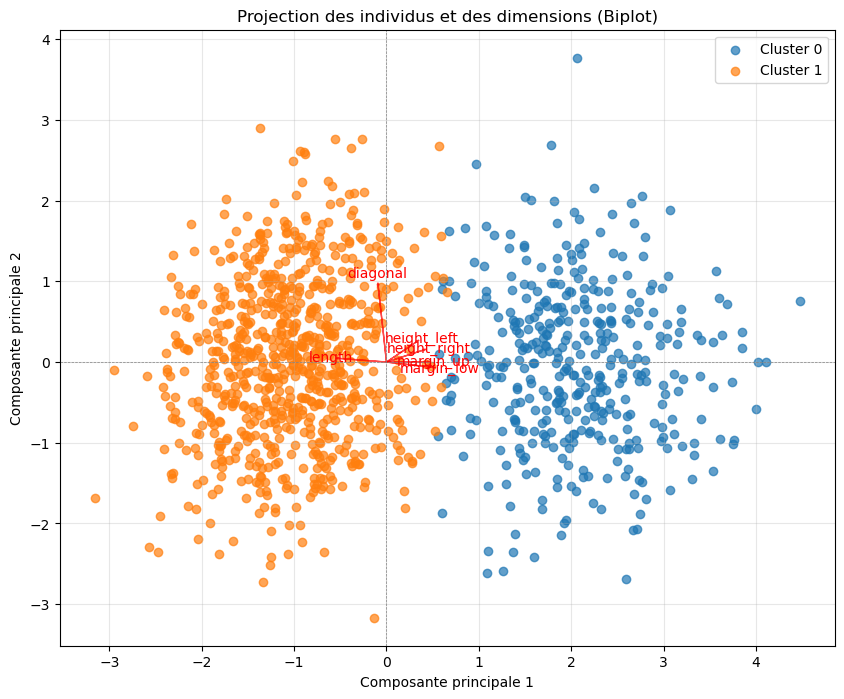

In [52]:
def biplot(scores, loadings, labels, cluster_labels=None, cluster_colors=None):
    """
    Trace un biplot pour visualiser la projection des individus.

    Paramètres :
    - scores : np.array, coordonnées des individus dans l'espace réduit.
    - loadings : np.array, coordonnées des vecteurs des variables.
    - labels : list, noms des variables explicatives.
    - cluster_labels : list ou np.array, étiquettes des clusters pour chaque individu (optionnel).
    - cluster_colors : dict, mapping des couleurs pour chaque cluster (optionnel).
    """
    plt.figure(figsize=(10, 8))
    x_vector = loadings[:, 0]
    y_vector = loadings[:, 1]
    x_data = scores[:, 0]
    y_data = scores[:, 1]

    # Tracer les individus
    if cluster_labels is not None:
        unique_clusters = np.unique(cluster_labels)
        for cluster in unique_clusters:
            indices = np.where(cluster_labels == cluster)
            plt.scatter(x_data[indices], y_data[indices], label=f'Cluster {cluster}', alpha=0.7)
    else:
        plt.scatter(x_data, y_data, alpha=0.7)

    # Tracer les vecteurs des variables
    for i, (x, y) in enumerate(zip(x_vector, y_vector)):
        plt.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.02)
        plt.text(x * 1.15, y * 1.15, labels[i], color='red', ha='center', va='center')

    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.title('Projection des individus (Biplot)')
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    if cluster_labels is not None:
        plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# PCA pour réduire à 2 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Appliquer le biplot
biplot(
    scores=X_pca,
    loadings=pca.components_.T,
    labels=X.columns,
    cluster_labels=kmeans.labels_,  # Ajouter les étiquettes des clusters si disponibles
    cluster_colors={0: 'blue', 1: 'orange'}  # Optionnel
)


### 4.2 KNN

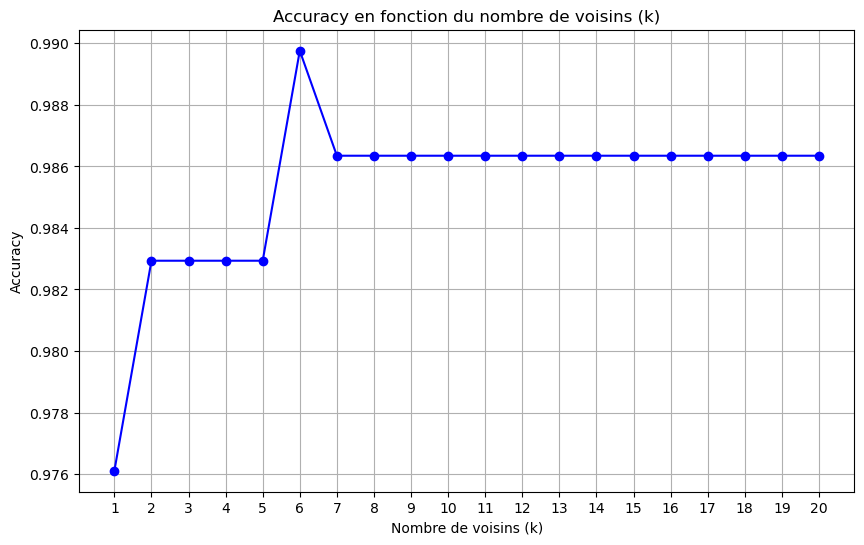

In [31]:
# Tester différentes valeurs de k
scores = []
k_values = range(1, 21)  # Tester k de 1 à 20
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.title("Accuracy en fonction du nombre de voisins (k)")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid()
plt.show()

In [32]:
# Initialisation du modèle KNN
knn = KNeighborsClassifier(n_neighbors=6)  

# Entraîner le modèle sur le jeu d'entraînement
knn.fit(X_train_scaled, y_train)

# Prédictions sur le jeu de test
y_pred_knn = knn.predict(X_test_scaled)

# Évaluation des performances
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_knn))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_knn))

Accuracy : 0.9897610921501706

Matrice de confusion :
 [[ 96   3]
 [  0 194]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        99
           1       0.98      1.00      0.99       194

    accuracy                           0.99       293
   macro avg       0.99      0.98      0.99       293
weighted avg       0.99      0.99      0.99       293



### 4.3 Random Forest

In [33]:
# Initialisation du modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement sur le jeu d'entraînement
rf.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_rf = rf.predict(X_test)

# Évaluation des performances
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))

Accuracy : 0.9897610921501706

Matrice de confusion :
 [[ 96   3]
 [  0 194]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        99
           1       0.98      1.00      0.99       194

    accuracy                           0.99       293
   macro avg       0.99      0.98      0.99       293
weighted avg       0.99      0.99      0.99       293



### 4.4 Régression Logistique

In [34]:
# Initialisation du modèle de régression logistique
logreg = LogisticRegression(random_state=42)

# Entraînement sur les données standardisées
logreg.fit(X_train_scaled, y_train)

# Prédictions sur le jeu de test
y_pred_logreg = logreg.predict(X_test_scaled)

# Évaluation des performances
print("Accuracy :", accuracy_score(y_test, y_pred_logreg))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_logreg))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_logreg))

Accuracy : 0.9897610921501706

Matrice de confusion :
 [[ 96   3]
 [  0 194]]

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        99
           1       0.98      1.00      0.99       194

    accuracy                           0.99       293
   macro avg       0.99      0.98      0.99       293
weighted avg       0.99      0.99      0.99       293



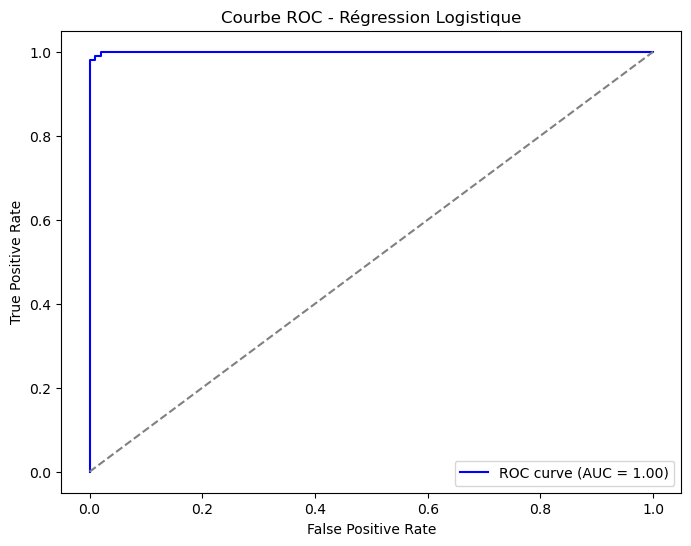

In [35]:
# Calculer les probabilités pour le jeu de test
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_logreg)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC - Régression Logistique")
plt.legend(loc="lower right")
plt.show()


### 4.5 Analyse des résultats lié au algorithmes

In [36]:
# Transformer les labels 0 et 1 en False et True pour correspondre aux clés du rapport de classification
y_test = y_test.map({0: "False", 1: "True"})

y_pred_kmeans = pd.Series(y_pred_kmeans).map({0: "False", 1: "True"})
y_pred_knn = pd.Series(y_pred_knn).map({0: "False", 1: "True"})
y_pred_rf = pd.Series(y_pred_rf).map({0: "False", 1: "True"})
y_pred_logreg = pd.Series(y_pred_logreg).map({0: "False", 1: "True"})

In [37]:
# Stocker les résultats dans un dictionnaire
results = {
    "Algorithme": ["K-Means", "KNN", "Random Forest", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_kmeans),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_logreg)
    ],
    "Precision": [
        classification_report(y_test, y_pred_kmeans, output_dict=True)["True"]["precision"],
        classification_report(y_test, y_pred_knn, output_dict=True)["True"]["precision"],
        classification_report(y_test, y_pred_rf, output_dict=True)["True"]["precision"],
        classification_report(y_test, y_pred_logreg, output_dict=True)["True"]["precision"]
    ],
    "Recall": [
        classification_report(y_test, y_pred_kmeans, output_dict=True)["True"]["recall"],
        classification_report(y_test, y_pred_knn, output_dict=True)["True"]["recall"],
        classification_report(y_test, y_pred_rf, output_dict=True)["True"]["recall"],
        classification_report(y_test, y_pred_logreg, output_dict=True)["True"]["recall"]
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_kmeans, output_dict=True)["True"]["f1-score"],
        classification_report(y_test, y_pred_knn, output_dict=True)["True"]["f1-score"],
        classification_report(y_test, y_pred_rf, output_dict=True)["True"]["f1-score"],
        classification_report(y_test, y_pred_logreg, output_dict=True)["True"]["f1-score"]
    ]
}

# Convertir en DataFrame pour affichage
results_df = pd.DataFrame(results)

# Affichage des résultats
print(results_df)


            Algorithme  Accuracy  Precision    Recall  F1-Score
0              K-Means  0.979522   0.974747  0.994845  0.984694
1                  KNN  0.989761   0.984772  1.000000  0.992327
2        Random Forest  0.989761   0.984772  1.000000  0.992327
3  Logistic Regression  0.989761   0.984772  1.000000  0.992327


In [38]:
df_billets_sansna

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [39]:
# Comparer les prédictions des modèles
print("Prédictions identiques entre KNN et Random Forest :", (y_pred_knn == y_pred_rf).all())
print("Prédictions identiques entre KNN et Régression Logistique :", (y_pred_knn == y_pred_logreg).all())
print("Prédictions identiques entre Random Forest et Régression Logistique :", (y_pred_rf == y_pred_logreg).all())


Prédictions identiques entre KNN et Random Forest : False
Prédictions identiques entre KNN et Régression Logistique : False
Prédictions identiques entre Random Forest et Régression Logistique : True


Cela indique que le modèle a une performance constante et fiable sur l’ensemble des données.

---

## Comparaison des performances des algorithmes

| Algorithme            | Accuracy  | Precision   | Recall     | F1-Score   |
|-----------------------|-----------|-------------|------------|------------|
| **K-Means**           | 0.979522  | 0.974747    | 0.994845   | 0.984694   |
| **KNN**               | 0.989761  | 0.984772    | 1.000000   | 0.992327   |
| **Random Forest**      | 0.989761  | 0.984772    | 1.000000   | 0.992327   |
| **Logistic Regression** | 0.989761  | 0.984772    | 1.000000   | 0.992327   |

### Observations :
- **K-Means** :
- Légèrement moins performant avec une accuracy de 97.95%, ce qui est attendu pour un algorithme non supervisé.
- **KNN, Random Forest, Logistic Regression** :
- Ces algorithmes ont des performances quasi-identiques avec une accuracy de 98.98% et des scores de précision, rappel, et F1 très élevés.
- La convergence des performances entre Random Forest et Régression Logistique peut être expliquée par la simplicité des données et leur bonne séparabilité.

---

## Analyse des prédictions identiques

Pour mieux comprendre la convergence des performances, nous avons comparé les prédictions des algorithmes entre eux :

- **Prédictions identiques entre KNN et Random Forest** : `False`
- **Prédictions identiques entre KNN et Régression Logistique** : `False`
- **Prédictions identiques entre Random Forest et Régression Logistique** : `True`

### Interprétation :
- Les différences entre **KNN** et les autres algorithmes (Random Forest, Régression Logistique) montrent qu’ils classifient certains échantillons différemment, probablement dans des zones limites.
- **Random Forest et la Régression Logistique** produisent des prédictions identiques, ce qui suggère que les deux modèles trouvent des frontières de décision similaires pour ce dataset.

### Conclusion :
- Bien que les performances soient similaires, l’analyse des prédictions montre que **Random Forest** et **Régression Logistique** convergent fortement, ce qui peut guider le choix du modèle final selon les priorités du projet (robustesse vs interprétabilité).


In [40]:
# Revenir aux labels 0 et 1 pour y_test et les prédictions
y_test = y_test.map({"False": 0, "True": 1})

y_pred_kmeans = y_pred_kmeans.map({"False": 0, "True": 1})
y_pred_knn = y_pred_knn.map({"False": 0, "True": 1})
y_pred_rf = y_pred_rf.map({"False": 0, "True": 1})
y_pred_logreg = y_pred_logreg.map({"False": 0, "True": 1})


In [41]:
from sklearn.model_selection import train_test_split

# Sous-échantillonnage
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Réentraîner les modèles avec moins de données
rf.fit(X_sub, y_sub)
y_pred_rf_sub = rf.predict(X_test)
print("Accuracy Random Forest (sous-échantillon) :", accuracy_score(y_test, y_pred_rf_sub))


Accuracy Random Forest (sous-échantillon) : 0.9897610921501706


Ces scores montrent que le modèle maintient une accuracy élevée sur chaque pli, confirmant sa robustesse.

- **Accuracy moyenne** : 98.9%


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Scores de validation croisée :", scores)
print("Accuracy moyenne :", scores.mean())


Scores de validation croisée : [0.99145299 0.98717949 0.99145299 0.9957265  0.98717949]
Accuracy moyenne : 0.9905982905982906


## Validation croisée pour Random Forest

La validation croisée permet de vérifier la robustesse du modèle en évaluant ses performances sur plusieurs sous-échantillons des données.

- **Scores de validation croisée** : 99%


In [43]:
# Fonction pour prédire sur un nouveau jeu de données
# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle de régression logistique
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)
def predict_on_new_data(model, scaler, file_path):
    """
    Applique un modèle entraîné sur un nouveau jeu de données pour prédire et ajouter une colonne 'prediction'.

    Paramètres :
    - model : modèle entraîné (Logistic Regression dans ce cas).
    - scaler : scaler utilisé pour standardiser les données.
    - file_path : chemin du fichier CSV contenant les nouvelles données à prédire.

    Retourne :
    - DataFrame avec une colonne 'prediction' et un résumé des prédictions.
    """
    try:
        # Charger le fichier
        df_test = pd.read_csv(file_path, sep=';')

        # Préparer les données pour la prédiction
        X_test_new = df_test[X.columns]
        X_test_new_scaled = scaler.transform(X_test_new)

        # Ajouter les prédictions
        df_test['prediction'] = model.predict(X_test_new_scaled)
        df_test['prediction'] = df_test['prediction'].apply(lambda x: 'True' if x == 1 else 'False')

        # Calculer les résumés des prédictions
        prediction_counts = df_test['prediction'].value_counts()
        print("Résumé des prédictions :")
        print(prediction_counts)

        print("Prédictions ajoutées au DataFrame :\n", df_test.head())

        return df_test

    except Exception as e:
        print(f"Erreur lors de la prédiction : {e}")
        return None



In [44]:
df_test = predict_on_new_data(log_model, scaler,'C:/Users/Romain/Desktop/Faux billets/billets_cleaned.csv')


Résumé des prédictions :
True     978
False    485
Name: prediction, dtype: int64
Prédictions ajoutées au DataFrame :
    is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length prediction  
0  112.83       True  
1  113.09       True  
2  113.16       True  
3  113.51       True  
4  112.54       True  


In [45]:
# Exemple de sauvegarde
scaler = StandardScaler()
model = LogisticRegression()

# Entraînement fictif pour l'exemple
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
model.fit(X_train_scaled, y_train)

joblib.dump(model, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [51]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import ttk
import pandas as pd
import joblib
import os
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from matplotlib.figure import Figure


# Charger le modèle et le scaler
def load_model_and_scaler():
    model_file = "logistic_model.pkl"
    scaler_file = "scaler.pkl"
    
    if not os.path.exists(model_file) or not os.path.exists(scaler_file):
        messagebox.showerror("Erreur", "Modèle ou scaler introuvable. Veuillez exécuter le 1ᵉʳ notebook pour les générer.")
        root.quit()
    
    model = joblib.load(model_file)
    scaler = joblib.load(scaler_file)
    return model, scaler


# Fonction pour charger un CSV et prédire
def load_csv_and_predict():
    file_path = filedialog.askopenfilename(filetypes=[("Fichiers CSV", "*.csv")])
    if not file_path:
        return
    
    try:
        # Charger les données CSV
        data = pd.read_csv(file_path, sep=",")
        required_columns = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
        
        # Vérifier les colonnes requises
        if not all(col in data.columns for col in required_columns):
            raise ValueError(f"Le fichier doit contenir les colonnes suivantes : {required_columns}")
        
        # Standardiser les données et prédire
        X = data[required_columns]
        X_scaled = scaler.transform(X)
        data['prédiction'] = model.predict(X_scaled)
        
        # Calculer le nombre de vrais et faux billets
        num_genuine = (data['prédiction'] == 1).sum()
        num_fake = (data['prédiction'] == 0).sum()
        
        # Mettre à jour les labels des résultats
        genuine_label.config(text=f"Vrais billets : {num_genuine}", fg="green")
        fake_label.config(text=f"Faux billets : {num_fake}", fg="red")
        
        # Afficher les résultats détaillés et les graphiques dans une nouvelle fenêtre
        display_results_and_charts(data, num_genuine, num_fake)
    
    except Exception as e:
        messagebox.showerror("Erreur", str(e))


# Fonction pour afficher les résultats détaillés et les graphiques
def display_results_and_charts(data, num_genuine, num_fake):
    results_window = tk.Toplevel(root)
    results_window.title("Résultats et Visualisations")
    
    # Frame pour le tableau
    frame_table = ttk.Frame(results_window)
    frame_table.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=10, pady=10)
    
    # Tableau des résultats
    tree = ttk.Treeview(frame_table, columns=list(data.columns), show="headings")
    for col in data.columns:
        tree.heading(col, text=col)
        tree.column(col, anchor=tk.CENTER, width=100)
    
    for _, row in data.iterrows():
        tree.insert("", tk.END, values=list(row))
    
    tree.pack(fill=tk.BOTH, expand=True)

    # Frame pour les graphiques
    frame_charts = ttk.Frame(results_window)
    frame_charts.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True, padx=10, pady=10)
    
    # Création de l'histogramme
    fig = Figure(figsize=(5, 4), dpi=100)
    ax = fig.add_subplot(111)
    ax.bar(['Vrais billets', 'Faux billets'], [num_genuine, num_fake], color=['green', 'red'])
    ax.set_title("Distribution des billets")
    ax.set_ylabel("Nombre de billets")
    
    # Ajouter l'histogramme à Tkinter
    canvas = FigureCanvasTkAgg(fig, frame_charts)
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
    canvas.draw()

    # Création du camembert
    fig_pie = Figure(figsize=(5, 4), dpi=100)
    ax_pie = fig_pie.add_subplot(111)
    sizes = [num_genuine, num_fake]
    labels = ['Vrais billets', 'Faux billets']
    colors = ['green', 'red']
    explode = (0.1, 0)  # Décalage pour le camembert
    ax_pie.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax_pie.set_title("Proportion des vrais et faux billets")
    
    # Ajouter le camembert à Tkinter
    canvas_pie = FigureCanvasTkAgg(fig_pie, frame_charts)
    canvas_pie.get_tk_widget().pack(fill=tk.BOTH, expand=True)
    canvas_pie.draw()


# Fonction pour exporter les résultats
def export_results(data):
    file_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV Files", "*.csv")])
    if file_path:
        data.to_csv(file_path, index=False)
        messagebox.showinfo("Succès", f"Résultats exportés : {file_path}")


# Interface principale
root = tk.Tk()
root.title("Application de prédiction de billets")
root.geometry("800x400")

# Charger le modèle et le scaler
model, scaler = load_model_and_scaler()

# Interface graphique
label = tk.Label(root, text="Application de prédiction de billets", font=("Helvetica", 16))
label.pack(pady=20)

button = ttk.Button(root, text="Charger un fichier CSV", command=load_csv_and_predict)
button.pack(pady=20)

# Labels pour afficher les vrais et faux billets avec des couleurs distinctes
genuine_label = tk.Label(root, text="Vrais billets : 0", font=("Helvetica", 14), fg="green")
genuine_label.pack(pady=5)

fake_label = tk.Label(root, text="Faux billets : 0", font=("Helvetica", 14), fg="red")
fake_label.pack(pady=5)

root.mainloop()
